In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv('heart.csv')
array = df.values
X = array[:, 0:12]
Y = array[:,13]

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20, random_state=0)
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
print((accuracy_score(Y_test, predictions)))


0.9512195121951219


In [11]:
print((classification_report(Y_test, predictions)))
print(confusion_matrix(Y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        98
         1.0       1.00      0.91      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.96      0.95      0.95       205

[[98  0]
 [10 97]]


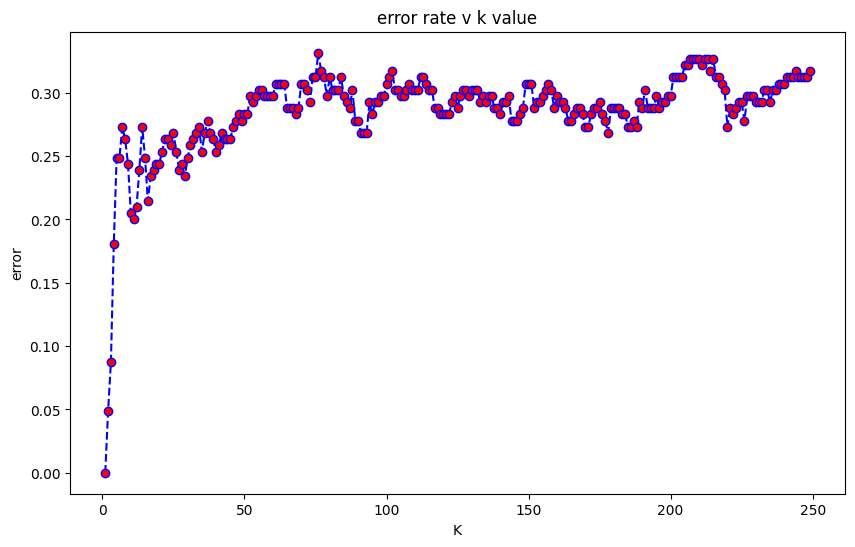

In [ ]:
error = []
for i in range(1,250):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i!=Y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,250), error, color = 'blue', linestyle = 'dashed', marker= 'o', markerfacecolor = 'red')
plt.title('error rate v k value')
plt.xlabel('K')
plt.ylabel('error')
plt.show()